In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
ins_data = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')

In [2]:
# Dropping duplicated recovery amounts. Because other columns are irrelevant for this query, not concerned with losing
# coverage information that is present in some duplicates but not in others. Selected all but one outlier, which
# provides a better visual representation of the categorical distribution of recovery amounts. 
drop_dups = ins_data[ins_data.duplicated(subset='File No.', keep='last')]
drop_dups = drop_dups[drop_dups['Recovery'] < 838039.00]

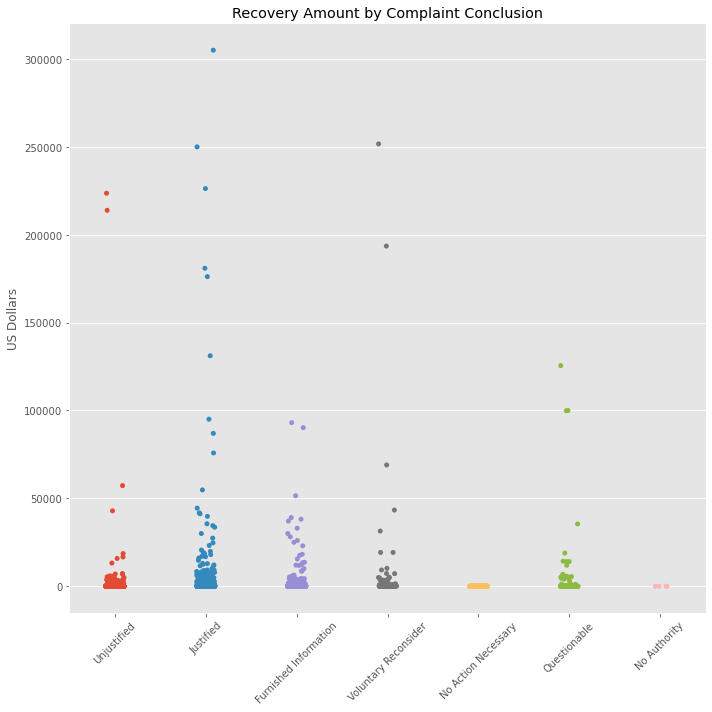

In [33]:
# Looking at which Conclusions had the highest recovery amounts
labels = ['Unjustified', 'Justified',  'Furnished Information', 'Voluntary Reconsider', 'No Action Necessary', 
          'Questionable','No Authority']
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.stripplot(x=drop_dups['Conclusion'].dropna(), y=drop_dups['Recovery'], jitter=0.1)
ax.set_xticklabels(labels=labels, rotation=45)
ax.set(title= 'Recovery Amount by Complaint Conclusion', xlabel = None, ylabel='US Dollars')
plt.tight_layout()
plt.savefig('Recovery_amt_by_concl_auto')

In [4]:
# Because justified claims tend to have higher payouts, selecting justified from the Conclusion column
# to see which SubReasons were most frequent
ins_data[ins_data['Conclusion'] == 'Justified'].groupby('SubReason') \
                                    .count().sort_values('Company', ascending=False).head(25)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,Disposition,Conclusion,Recovery,Status
SubReason,,,,,,,,,,,
Claim Delays,340,340,340,337,262,37,340,340,340,340,340
Denial of Claim,308,308,308,307,249,89,308,308,308,308,308
Unsatisfactory Settlement,140,140,140,139,119,60,140,140,140,140,140
Claim Procedure,139,139,139,138,102,50,139,139,139,139,139
Comparative Negligence,93,93,93,93,77,0,93,93,93,93,93
Non-Renewal,77,77,77,75,60,0,77,77,77,77,77
Excessive Charges,65,65,65,65,57,0,65,65,65,65,65
Unsatisfactory Offer,63,63,63,63,50,0,63,63,63,63,63
Eligibility of Provider,61,61,61,59,46,46,61,61,61,61,61


In [5]:
# Selecting rows with sub_reasons identified as potentially resulting in high legal fees. While there were 
# three SubReasons associated with "delays", two had a count of one so were excluded
# All reasons in the 'isin' call were in the top 20 for justified conclusions, which is in line with Chadwell's 
# comment that these reasons are hard to litigate against
sub_reasons = ins_data[ins_data['SubReason'].isin(['Unsatisfactory Offer', 
                                                 'Premium/Notice', 'Premium/Rate Increase', 'Medical Necessity',
                                                'Actual Cash Value', 'Claim Delays', 
                                                 'Denial of Claim'])]

In [6]:
sub_reasons['SubReason'].value_counts()

Denial of Claim          2503
Claim Delays             1935
Premium/Notice            545
Premium/Rate Increase     540
Unsatisfactory Offer      523
Medical Necessity         426
Name: SubReason, dtype: int64

In [7]:
# Selecting rows related to auto coverage, dropping status column. By selecting coverage prior to dropping duplicates
# the largest amount of data is preserved across all columns. 
auto_df = sub_reasons[sub_reasons['Coverage'].notna()]
auto_df = auto_df[auto_df['Coverage'].str.contains('Auto')].drop(columns='Status')
auto_df['SubReason'].value_counts()

Claim Delays            894
Denial of Claim         744
Unsatisfactory Offer    235
Premium/Notice          156
Name: SubReason, dtype: int64

In [8]:
# Adding complaint duration column in months
auto_df['Closed']= pd.to_datetime(auto_df['Closed'])
auto_df['Opened']= pd.to_datetime(auto_df['Opened'])
auto_df['Complaint Duration'] = auto_df['Closed'] - auto_df['Opened']
auto_df['Complaint Duration'] = (auto_df['Complaint Duration'] / np.timedelta64(1, 'M')).round(2)
auto_df.sort_values('Complaint Duration', ascending=False)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Complaint Duration
3490,HDI Global Insurance Company,403046,2014-06-12,2016-01-15,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,19.12
5544,SPARTA Insurance Company,403046,2014-06-12,2016-01-15,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,19.12
2807,21st Century Premier Insurance Company,700430,2017-01-25,2018-04-18,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Unjustified,446.65,14.72
9125,Mid-Century Insurance Company,705202,2017-11-15,2019-01-25,Auto Medical Payment,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,14.32
3008,LM General Insurance Company,802444,2018-05-23,2019-03-05,Auto,NaN,Premium and Rating,Premium/Notice,Premium Refund,Voluntary Reconsider,682.08,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...
9297,Standard Fire Insurance Company (The),902560,2019-06-07,NaT,Auto,NaN,Premium and Rating,Premium/Notice,NaN,NaN,0.00,NaN
9535,Permanent General Assurance Corporation,902608,2019-06-10,NaT,Auto Physical Damage,NaN,Unfair Claims Practice,Denial of Claim,NaN,NaN,0.00,NaN
9591,Travelers Property Casualty Company of America,902612,2019-06-10,NaT,Auto Liability,NaN,Unfair Claims Practice,Denial of Claim,NaN,NaN,0.00,NaN
10004,Progressive Casualty Insurance Company,902559,2019-06-07,NaT,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,NaN,NaN,0.00,NaN


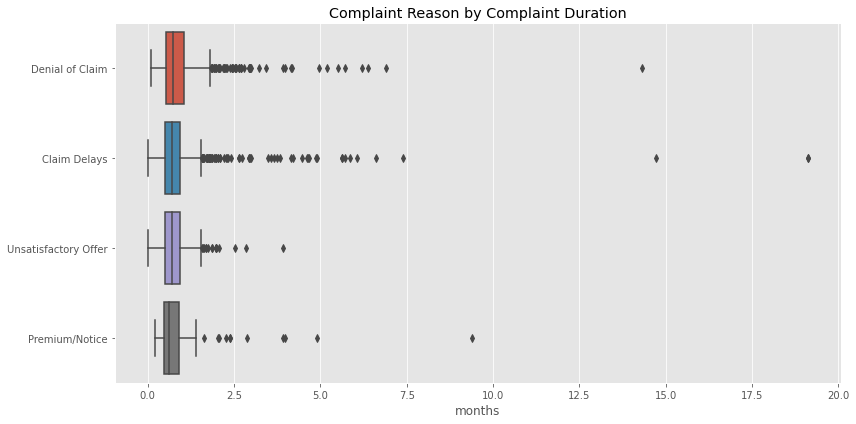

In [34]:
# Time is money. Of these subreasons for complaint identified as having high potential for litigation, plotting vs 
# duration of complaint
# Title of graph uses Reason instead of SubReason for readability
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x=auto_df['Complaint Duration'], y=auto_df['SubReason'])
ax.set(title= 'Complaint Reason by Complaint Duration', xlabel='months', ylabel=None)
plt.tight_layout();
plt.savefig('Reason_duration_auto')

In [10]:
# looking at various stats

auto_df[['SubReason', 'Complaint Duration']].groupby('SubReason')['Complaint Duration'].max()


SubReason
Claim Delays            19.12
Denial of Claim         14.32
Premium/Notice           9.40
Unsatisfactory Offer     3.91
Name: Complaint Duration, dtype: float64

In [11]:
# next steps - start company analysis and normalize for company size. Look at data for top 5 auto 
# (go with well-known rather than count, as that would require finding financial information for 616 companies

In [12]:
# Choosing Allstate, GEICO, Progressive, State Farm from the top ten- some of these companies have more than one name
top_10_auto = auto_df['Company'].value_counts()[0:10]
top_10_auto = top_5_auto.to_frame().reset_index()

top_10_auto = top_5_auto.rename(columns={'index':'Company', 'Company':'No. Complaints'})
top_10_auto

NameError: name 'top_5_auto' is not defined

In [13]:
# I think the only way to display what I want is with a grouped bar chart. Or, subplots
company_auto = auto_df[auto_df['Company'].isin(['Allstate Fire and Casualty Insurance Company', 
                                                'GEICO Indemnity Company', 'Progressive Direct Insurance Company', 
                                                'GEICO General Insurance Company', 'Progressive Casualty Insurance Company',
                                               'State Farm Mutual Automobile Insurance Company', 'Allstate Insurance Company'])]


In [14]:
ins_data.sort_values('Opened')

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
11886,Trenwick America Reinsurance Corporation,800017,01/02/2018,01/02/2018,Other [Enter Coverage],NaN,Other,No Subreason,No Cause For Action,Unjustified,0.0,Closed
12130,Metropolitan Casualty Insurance Company,800009,01/02/2018,01/23/2018,Auto,NaN,Premium and Rating,Excessive Charges,Company Position Upheld,Unjustified,0.0,Closed
12565,Stewart Title Guaranty Company,800008,01/02/2018,02/15/2018,Title Insurance,NaN,Unfair Claims Practice,Unsatisfactory Offer,Refer-Judicial/Attorney,Unjustified,0.0,Closed
12111,SAFECO Insurance Company of Illinois,800012,01/02/2018,01/19/2018,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,Closed
12102,Progressive Direct Insurance Company,800020,01/02/2018,01/18/2018,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Unjustified,18595.3,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
10158,State Farm Mutual Automobile Insurance Company,806008,12/31/2018,02/13/2019,Auto Liability,NaN,Unfair Claims Practice,Denial of Claim,Refer-Judicial/Attorney,Questionable,0.0,Closed
7095,American General Life Insurance Company,806009,12/31/2018,01/15/2019,Individual Annuity,Fixed Annuity,Unfair Claims Practice,Claim Procedure,Company Position Upheld,Unjustified,0.0,Closed
9634,"ConnectiCare Insurance Company, Inc",806018,12/31/2018,02/01/2019,NaN,NaN,Unfair Claims Practice,Claim Delays,Claim Paid With Interest,Justified,0.0,Closed
4063,"Cigna HealthCare of Connecticut, Inc",806010,12/31/2018,03/07/2019,NaN,NaN,Unfair Claims Practice,Denial of Claim,Furnished Information,Furnished Information,0.0,Closed


In [15]:
# Pulling value counts for each SubReason and company
prog_cas = company_auto[company_auto['Company'] == 'Progressive Casualty Insurance Company'].groupby('SubReason').count()
prog_dic = company_auto[company_auto['Company'] == 'Progressive Direct Insurance Company'].groupby('SubReason').count()
allstate_fc = company_auto[company_auto['Company'] == 'Allstate Fire and Casualty Insurance Company'].groupby('SubReason').count()
geico_indem = company_auto[company_auto['Company'] == 'GEICO Indemnity Company'].groupby('SubReason').count()
geico_gen  = company_auto[company_auto['Company'] == 'GEICO General Insurance Company'].groupby('SubReason').count()
state_farm = company_auto[company_auto['Company'] == 'State Farm Mutual Automobile Insurance Company'].groupby('SubReason').count()
allstate = company_auto[company_auto['Company'] == 'Allstate Insurance Company'].groupby('SubReason').count()
allstate

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,Disposition,Conclusion,Recovery,Complaint Duration
SubReason,,,,,,,,,,,
Claim Delays,20,20,20,20,20,0,20,20,20,20,20
Denial of Claim,17,17,17,15,17,0,17,15,15,17,15
Premium/Notice,4,4,4,4,4,0,4,4,4,4,4
Unsatisfactory Offer,7,7,7,7,7,0,7,7,7,7,7


In [16]:
grouped_bar_data = pd.DataFrame([
        ('Allstate Fire and Casualty','Claim Delays', 66),
        ('Allstate Fire and Casualty','Denial of Claim', 71),
        ('Allstate Fire and Casualty','Unsatisfactory Offer', 14),
        ('Allstate Fire and Casualty','Premium/Notice', 20),
        ('GEICO Indemnity','Claim Delays', 67),
        ('GEICO Indemnity','Denial of Claim', 62),
        ('GEICO Indemnity','Unsatisfactory Offer', 5),
        ('GEICO Indemnity','Premium/Notice', 11),
        ('Progressive Direct','Claim Delays', 45),
        ('Progressive Direct','Denial of Claim', 65),
        ('Progressive Direct','Unsatisfactory Offer', 11),
        ('Progressive Direct','Premium/Notice', 6),
        ('GEICO General','Claim Delays', 58),
        ('GEICO General','Denial of Claim',40),
        ('GEICO General','Unsatisfactory Offer', 10),
        ('GEICO General','Premium/Notice', 18),
        ('Progressive Casualty', 'Claim Delays', 34),
        ('Progressive Casualty', 'Denial of Claim', 54),
        ('Progressive Casualty', 'Unsatisfactory Offer', 4),
        ('Progressive Casualty', 'Premium/Notice', 12),
        ('State Farm Mutual Automobile', 'Claim Delays', 40),
        ('State Farm Mutual Automobile', 'Denial of Claim', 14),
        ('State Farm Mutual Automobile', 'Unsatisfactory Offer', 7),
        ('State Farm Mutual Automobile', 'Premium/Notice', 9),
        ('Allstate', 'Claim Delays', 20),
        ('Allstate', 'Denial of Claim', 17),
        ('Allstate', 'Unsatisfactory Offer', 4),
        ('Allstate', 'Premium/Notice', 7),
    ], 
    columns=['Company', 'SubReason', 'value']
)
grouped_bar_data= grouped_bar_data.set_index(['Company', 'SubReason']).value



In [17]:
plt.annotate?

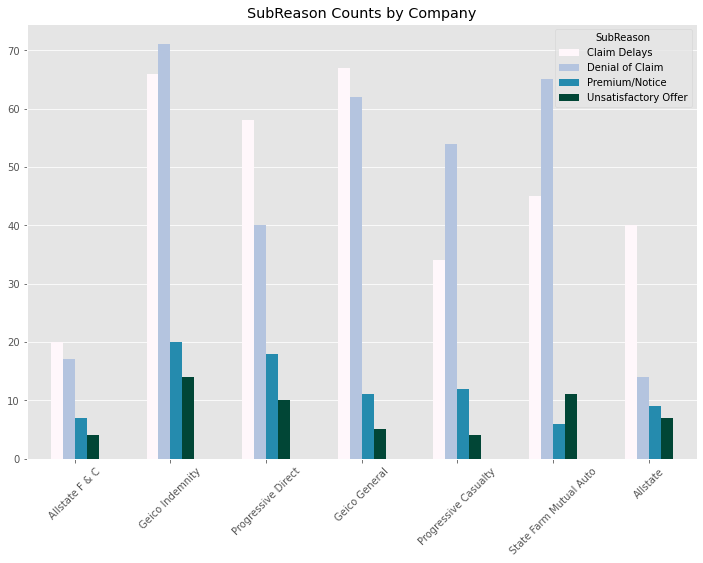

In [19]:
# Not normalized for company size
grp_labels = ['Allstate F & C', 'Geico Indemnity', 'Progressive Direct', 'Geico General', 'Progressive Casualty', 
                 'State Farm Mutual Auto', 'Allstate']
vis = grouped_bar_data.unstack().plot(kind='bar', stacked=False, figsize=(12,8), colormap='PuBuGn')
vis.set_xticklabels(labels=grp_labels, rotation=45)
vis.set_xlabel(None)
vis.set_title('SubReason Counts by Company')
vis.grid(which='major', axis='x')
plt.savefig('Auto_subreason_company_counts')

In [ ]:
# Creating a dictionary of values to be used to normalize data based on company size. 
# Used 2017 year end premium revenue (excluded other revenue streams). Values in millions
health_dict = {'Allstate_FC': 36513, 'GEICO_Indem': 57418, 'PD': 30933.3, 
               'GEICO_gen': 57418, 'Prog_cas': 30933.3, 'State': 43426, 'Allstate':36513}
normed_dict = {}
# divide by highest value (united)
for k, val in health_dict.items(): 
    normed_dict[k] = val/57418
normed_dict

In [21]:
# multiply each count by the associated normalization factor
normed_bar_data = pd.DataFrame([
        ('Allstate Fire and Casualty','Claim Delays', 66 *0.64),
        ('Allstate Fire and Casualty','Denial of Claim', 71*0.64),
        ('Allstate Fire and Casualty','Unsatisfactory Offer', 14*0.64),
        ('Allstate Fire and Casualty','Premium/Notice', 20*0.64),
        ('GEICO Indemnity','Claim Delays', 67),
        ('GEICO Indemnity','Denial of Claim', 62),
        ('GEICO Indemnity','Unsatisfactory Offer', 5),
        ('GEICO Indemnity','Premium/Notice', 11),
        ('Progressive Direct','Claim Delays', 45*0.54),
        ('Progressive Direct','Denial of Claim', 65*0.54),
        ('Progressive Direct','Unsatisfactory Offer', 11*0.54),
        ('Progressive Direct','Premium/Notice', 6*0.54),
        ('GEICO General','Claim Delays', 58),
        ('GEICO General','Denial of Claim',40),
        ('GEICO General','Unsatisfactory Offer', 10),
        ('GEICO General','Premium/Notice', 18),
        ('Progressive Casualty', 'Claim Delays', 34*0.54),
        ('Progressive Casualty', 'Denial of Claim', 54*0.54),
        ('Progressive Casualty', 'Unsatisfactory Offer', 4*0.54),
        ('Progressive Casualty', 'Premium/Notice', 12*0.54),
        ('State Farm Mutual Automobile', 'Claim Delays', 40*0.76),
        ('State Farm Mutual Automobile', 'Denial of Claim', 14*0.76),
        ('State Farm Mutual Automobile', 'Unsatisfactory Offer', 7*0.76),
        ('State Farm Mutual Automobile', 'Premium/Notice', 9*0.76),
        ('Allstate', 'Claim Delays', 20*0.64),
        ('Allstate', 'Denial of Claim', 17*0.64),
        ('Allstate', 'Unsatisfactory Offer', 4*0.64),
        ('Allstate', 'Premium/Notice', 7*0.64),
    ], 
    columns=['Company', 'SubReason', 'value']
)
normed_bar_data= normed_bar_data.set_index(['Company', 'SubReason']).value

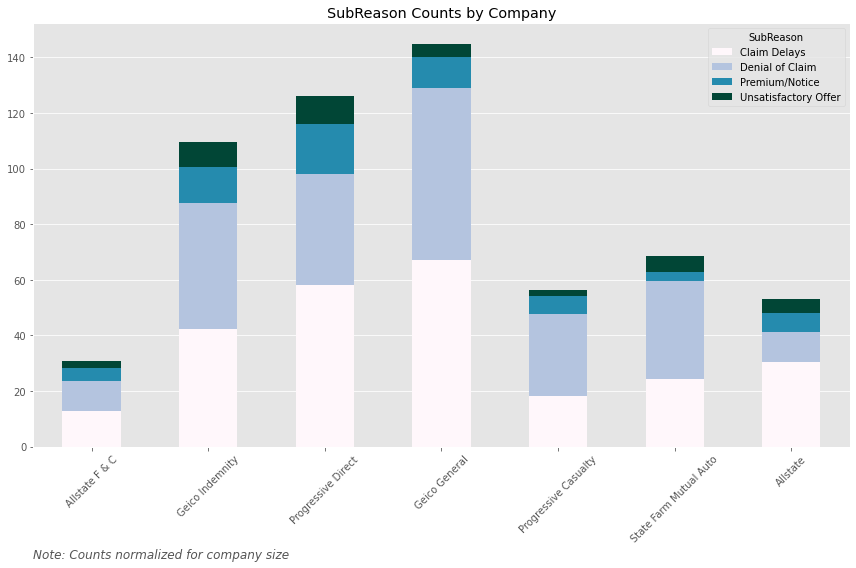

In [32]:

# Normalized bar chart
grp_labels = ['Allstate F & C', 'Geico Indemnity', 'Progressive Direct', 'Geico General', 'Progressive Casualty', 
                 'State Farm Mutual Auto', 'Allstate']
vis = normed_bar_data.unstack().plot(kind='bar', stacked=True, figsize=(12,8), colormap='PuBuGn')
vis.set_xticklabels(labels=grp_labels, rotation=45)
vis.set_xlabel('Note: Counts normalized for company size', position=(0., 1e6), horizontalalignment='left', style='italic')
vis.set_title('SubReason Counts by Company')
vis.grid(which='major', axis='x')
plt.tight_layout()
plt.savefig('Auto_subreason_company_counts_normed')

In [ ]:
geico_subsid = auto_data[auto_data['Company'].str.contains('GEICO')]
geico_subsid_arr = geico_subsid['Company'].unique()

progressive_subsid = auto_data[auto_data['Company'].str.contains('Progressive')]
progressive_subsid_arr = progressive_subsid['Company'].unique()
geico_subsid_arr